# Keras MNIST Example

![MnistExamples.png](images/MnistExamples.png) 
(source: [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database))

In [1]:
"""
Imports
"""
import numpy as np  # for array wrangling
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt  # for visualizing digits


print(tf.__version__)  # this notebooke was written for tf 1.12.0

1.12.0


## Dataset

Load and display some sample images and their distribution. Luckily, the MNIST dataset can be downloaded directly using Keras.

In [2]:
"""
Download Data
"""
# Keras (and Tensorflow) come prepackaged with some datasets
mnist_data = keras.datasets.mnist
# loading data loads 4 items:
#   traim_imgs - images used to train the model
#   train_lbls - "ground truth" label for each input image
#   test_imgs - images used to test the model
#   test_lbls - labels for test images
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist_data.load_data() 


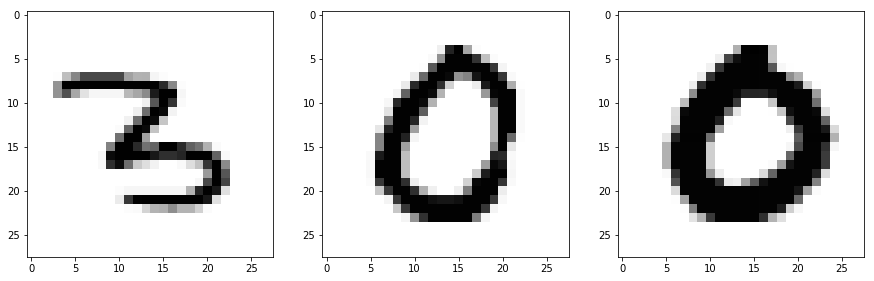

In [3]:
"""
Examine Inputs
"""
# choose some random digits and plot them
rand_idx = np.random.choice(test_imgs.shape[0], 3)
# 1x3 plot for 3 images
fig, axs = plt.subplots(1, 3)
for i, img in enumerate(rand_idx):
    axs[i].imshow(test_imgs[img], cmap='Greys') # plots an image in grayscale
# make image viewable and plot
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

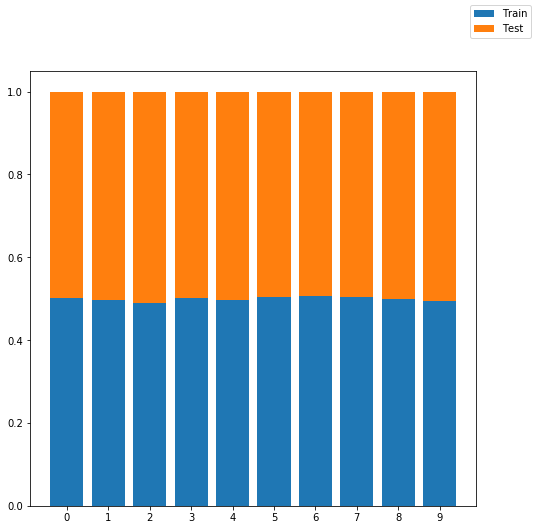

In [4]:
"""
Examine Distributions
"""

# this plots the relative amounts of each digit among the train and test datasets
# this dataset is very well curated, but there could be a senario where an input
# shows up much more in the train or test sets, which would throw off the model
# and might lead to bad test performance
counts_train = np.bincount(train_lbls) / train_lbls.shape[0]  # normalized counts
counts_test = np.bincount(test_lbls) / test_lbls.shape[0]     # normalized counts
frac_train = counts_train / (counts_train + counts_test)      # fraction train
frac_test = counts_test / (counts_train + counts_test)        # fraction test
# plot as stacked bar chart
fig, ax = plt.subplots(1,1)
ax.bar(range(10), frac_train)
ax.bar(range(10), frac_test, bottom=frac_train)
ax.set_xticks(range(10))
fig.legend(['Train', 'Test'])
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

## Model 

### Neural Network
![neuron.png](images/neuron.png)
![neural_net2.jpeg](images/neural_net2.jpeg)
Source [Standford](http://cs231n.github.io/neural-networks-1/)

In [5]:
"""
Dense-only Keras Model
"""

# Model Definitions:
#    Reshape - makes images "3D" by adding an empty dimension, Conv2D expects a 3D image
#      which is necessary for color images (e.g. the 3rd Dimension is Red, Blue, and Green)
#    Con2D - convolutional layer that works on 2D images (with 3rd dimension being channel)
#      filters - the "depth" of the output, number of feature maps to output from layer
#      kernel_size - size of sliding window that scans image (in above figure, kernel is in red)
#      strides - how far to slide kernel at each step (e.g. shift 1 to the right)
#      activation - function to apply to output of CNN, relu (REctified Linear Unit) is f(x) = max(0, x)
#      padding - add 0's to all sides of image so kernal can slide over image evenly (i.e. can't have
#        a fraction of a pixel), same means add enough 0's to make output same size as input (in 2D)
#    Flatten - make matrix 1D
#    Dense - fully connected (i.e. "Regular" Neural Network), size should equal number of output classes
model_dense_only = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
"""
Compile the Model
"""

# compiling the model optimizes the model and prepares it to run on the input data
# Definitions:
#    Optimizer - how to "tune" the model (i.e. how to learn), adam is a popular choice alongside 
#      gradient descent
#    Loss - what function to use to compare the output and the actual label, the higher the loss
#      the more the model needs to be "tuned", crossentropy is useful for discrete outputs and 
#      squared mean error for continuous ones
#    Metrics - what to use to evaluate the performance of the model (accuracy, F1, etc.)
model_dense_only.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
"""
Train & Test
"""
model_dense_only.fit(train_imgs, train_lbls, epochs=5)
test_loss, test_acc = model_dense_only.evaluate(test_imgs, test_lbls)

print('Test accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 10.2024 - acc: 0.3651
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 8.9592 - acc: 0.4428
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 7.5383 - acc: 0.5305
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 7.1239 - acc: 0.5566
Epoch 5/5
10000/10000 [==============================] - 0s 15us/step
Test accuracy: 0.5703


### Convolutional Neural Network
![Typical_cnn.png](images/Typical_cnn.png)
(source: [Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network))
![cnn_internal.png](images/cnn_internal.png)
(source: [Stanford](http://cs231n.github.io/convolutional-networks/))

In [8]:
"""
Declare Keras Model
"""

# Model Definitions:
#    Reshape - makes images "3D" by adding an empty dimension, Conv2D expects a 3D image
#      which is necessary for color images (e.g. the 3rd Dimension is Red, Blue, and Green)
#    Con2D - convolutional layer that works on 2D images (with 3rd dimension being channel)
#      filters - the "depth" of the output, number of feature maps to output from layer
#      kernel_size - size of sliding window that scans image (in above figure, kernel is in red)
#      strides - how far to slide kernel at each step (e.g. shift 1 to the right)
#      activation - function to apply to output of CNN, relu (REctified Linear Unit) is f(x) = max(0, x)
#      padding - add 0's to all sides of image so kernal can slide over image evenly (i.e. can't have
#        a fraction of a pixel), same means add enough 0's to make output same size as input (in 2D)
#    Flatten - make matrix 1D
#    Dense - fully connected (i.e. "Regular" Neural Network), size should equal number of output classes
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=2, kernel_size=4, strides=1, activation=tf.nn.relu, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
"""
Compile the Model
"""

# compiling the model optimizes the model and prepares it to run on the input data
# Definitions:
#    Optimizer - how to "tune" the model (i.e. how to learn), adam is a popular choice alongside 
#      gradient descent
#    Loss - what function to use to compare the output and the actual label, the higher the loss
#      the more the model needs to be "tuned", crossentropy is useful for discrete outputs and 
#      squared mean error for continuous ones
#    Metrics - what to use to evaluate the performance of the model (accuracy, F1, etc.)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Our Model
![our_model.png](images/our_model.png)

In [10]:
"""
Untrainable Model for Activations
"""

# This model uses the same first two layers as the other model but inherits the 
# weights of the CNN in our trained model, this way we can extract the 
# activations (more on this later)
model_demo = keras.Sequential()
model_demo.add(keras.layers.Reshape(target_shape=(28, 28, 1)))
model_demo.add(keras.layers.Conv2D(
    filters=2, 
    kernel_size=4, 
    strides=2, 
    activation=tf.nn.relu, 
    padding="same",
    weights=model.layers[1].get_weights()))

Epoch 1/1
60000/60000 [==============================] - 7s 120us/step - loss: 4.6873 - acc: 0.6908


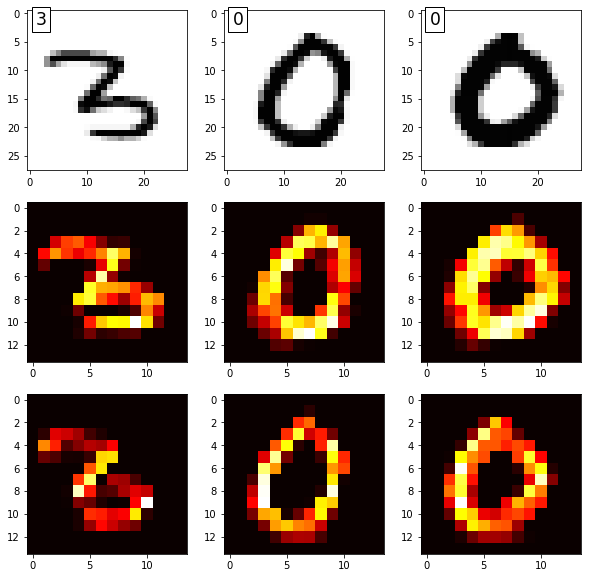

In [11]:
"""
Train One Epoch
"""
# Train the model (1 epoch = run through whole dataset 1 time)
model.fit(train_imgs, train_lbls, epochs=1)

# Generate probabilities, predictions, and activations
# Model outputs probabilities of each class label for each input
# Highest probability becomes the predicted output
probas = model.predict(test_imgs)
prdctd_lbls = np.argmax(probas, axis=1)
activations = model_demo.predict(test_imgs)

# Plot:
#  1 - input image (chosen at random) with predicted label in top-left corner
#    colored red if incorrect, white otherwise
#  2 - Activation of feature map 1 as a heatmap (to show inner workings of CNN)
#  3 - Activation of feature map 2
fig, axs = plt.subplots(3, 3)
for i, img in enumerate(rand_idx):
    axs[0][i].imshow(test_imgs[img], cmap='Greys')
    # color background based on correctness
    color = 'white' if prdctd_lbls[img] == test_lbls[img] else 'red'
    # display the predicted label in the top left
    axs[0][i].text(1, 2, prdctd_lbls[img], fontsize='xx-large', bbox=dict(facecolor=color, alpha=1))
    # display activations
    axs[1][i].imshow(activations[img][:, :, 0], cmap='hot', interpolation='nearest')
    axs[2][i].imshow(activations[img][:, :, 1], cmap='hot', interpolation='nearest')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 2.7514 - acc: 0.8195


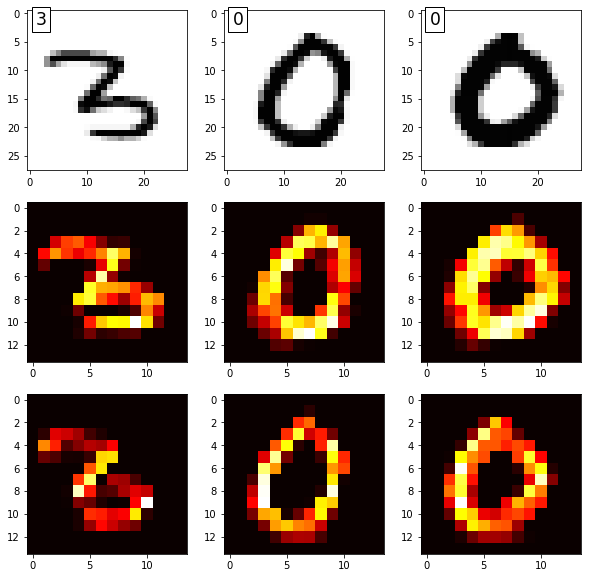

In [12]:
"""
Run Epoch 2
"""

# unlike other machine learning models that learn on a single pass through the data
# (e.g. KNN or Naive Bayes), deep learning models typically see the data multiple times
# while training, slightly tuning its interal parameters by backprogagation with each 
# pass through the data: an epoch

model.fit(train_imgs, train_lbls, epochs=1)

probas = model.predict(test_imgs)
prdctd_lbls = np.argmax(probas, axis=1)
activations = model_demo.predict(test_imgs)

# the model may be more accurate at this point and the activations may be more clear
# with regards to what feature they are defining 
fig, axs = plt.subplots(3, 3)
for i, img in enumerate(rand_idx):
    axs[0][i].imshow(test_imgs[img], cmap='Greys')
    # color background based on correctness
    color = 'white' if prdctd_lbls[img] == test_lbls[img] else 'red'
    # display the predicted label in the top left
    axs[0][i].text(1, 2, prdctd_lbls[img], fontsize='xx-large', bbox=dict(facecolor=color, alpha=1))
    # display activations
    axs[1][i].imshow(activations[img][:, :, 0], cmap='hot', interpolation='nearest')
    axs[2][i].imshow(activations[img][:, :, 1], cmap='hot', interpolation='nearest')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [13]:
"""
Test Accuracy
"""
# The data is almost always split into 2 sets: training and test. The model is only trained
# on the training data, then evaluated using the test data. This way if the model doesn't
# generalize (e.g. it doesn't learn general features of the data, only features specific to
# the training data), the test accuracy will reflect that (i.e. high training accuracy but
# low test accuracy known as overfitting)
test_loss, test_acc = model.evaluate(test_imgs, test_lbls)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 68us/step
Test accuracy: 0.8646


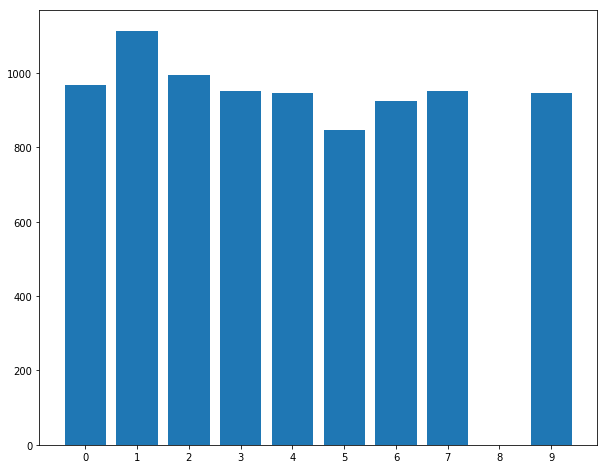

In [14]:
"""
Distribution of Predictions
"""

# Plot the relative number of correct predictions per class
correct = prdctd_lbls == test_lbls # get correct guesses
corr_count = np.bincount(test_lbls[correct])
corr_rel = corr_count / corr_count.sum()
fig, ax = plt.subplots(1, 1)
ax.bar(range(10), corr_count)
ax.set_xticks(range(10))
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

In [15]:
"""
Use Confusion Matrix
"""

# confusion matrix provide more indepth results by showing the 
# number of each predicted digit (columns) and actual digits (rows)
# so for example row 0, col 0 is 955 0's that were predicted 0, row 0, col1
# shows 0 0's were mistaken for 1's and row 1, col 0 shows 2 1's were predicted
# as 0's
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prdctd_lbls, test_lbls))

[[ 969    0   10    1    1    3   16    0   78    4]
 [   0 1114    4    0    4    8    6    1   73    7]
 [   2    8  995   10    7    2    2   23  263    6]
 [   0    2    5  952    0   15    0   14   78    8]
 [   1    3    3    1  947    1    4    9   60   24]
 [   5    0    1   35    0  847    4    2  199    5]
 [   2    8    2    0    5    9  926    0   45    0]
 [   0    0   11    4    2    2    0  951   17   10]
 [   0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    7   16    5    0   28  161  945]]


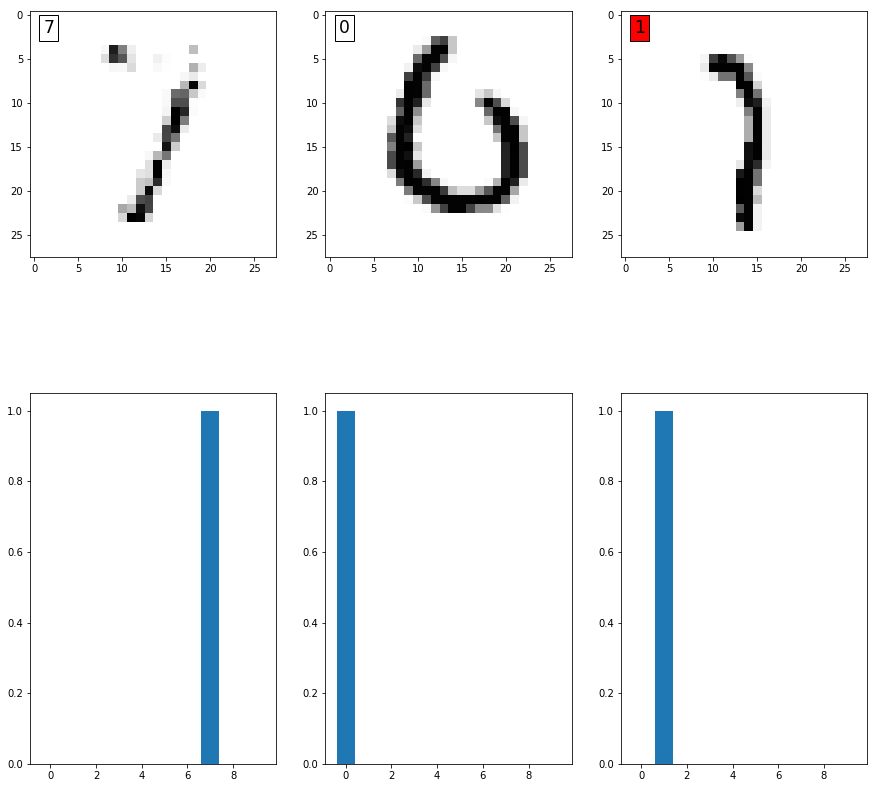

In [16]:
"""
Interesting Examples
"""

# These inputs are more difficult to classify and may show some interesting results 
# either by being incorrectly classified, or potentially classified better than by a human 
# this plot includes the probabilities of each output to show what the model thought might be
# its next best guess or how confident it was with its results
wrongs = [6576, 1621, 1260]
fig, axs = plt.subplots(2, 3)
for i, img in enumerate(wrongs):
    axs[0][i].imshow(test_imgs[img], cmap='Greys')
    # color background based on correctness
    color = 'white' if prdctd_lbls[img] == test_lbls[img] else 'red'
    # display the predicted label in the top left
    axs[0][i].text(1, 2, prdctd_lbls[img], fontsize='xx-large', bbox=dict(facecolor=color, alpha=1))
    # display the predicted probabilities
    axs[1][i].bar(range(10), probas[img])
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

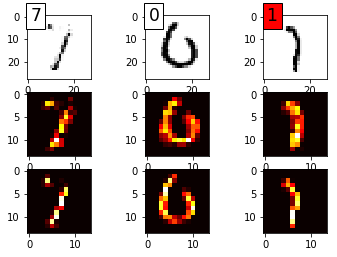

In [18]:
"""
Activations
"""
# same as above but showing activations rather than probabilities
ig, axs = plt.subplots(3, 3)
for i, img in enumerate(wrongs):
    axs[0][i].imshow(test_imgs[img], cmap='Greys')
    # color background based on correctness
    color = 'white' if prdctd_lbls[img] == test_lbls[img] else 'red'
    # display the predicted label in the top left
    axs[0][i].text(1, 2, prdctd_lbls[img], fontsize='xx-large', bbox=dict(facecolor=color, alpha=1))
    axs[1][i].imshow(activations[img][:, :, 0], cmap='hot')
    axs[2][i].imshow(activations[img][:, :, 1], cmap='hot')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()


## Further Improvements

There are plenty of things to do to improve this model, some examples you can try yourself are:
<li> Add more CNN layers</li>
 <li> Add pooling layer after CNN layer </li>
 <li> Normalize inputs between 0-1 </li>
 <li> Add dropout layer before CNN layer </li>
 <li> Augment dataset by rotating/scaling/transforming</li>
